<a href="https://colab.research.google.com/github/gustavoamora/busca/blob/main/optmization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementação Rastringin

Tabela de Resultados:
       Hill Climbing  HC com Restarts  Simulated Annealing          GA
count     100.000000       100.000000           100.000000  100.000000
mean       15.455432        14.556807            15.605498   13.712527
std         9.589865         9.439301             9.798047    6.631586
min         0.995099         0.001580             0.995731    1.218440
25%         7.962615         4.975187             7.217264    8.663274
50%        15.923916        15.919528            15.929641   13.429641
75%        24.876914        19.899867            24.874172   18.353136
max        40.794589        40.793083            40.793523   26.949312


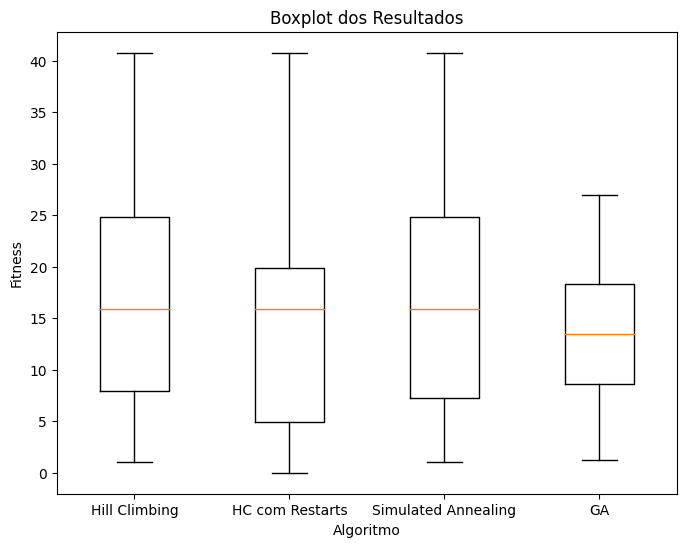

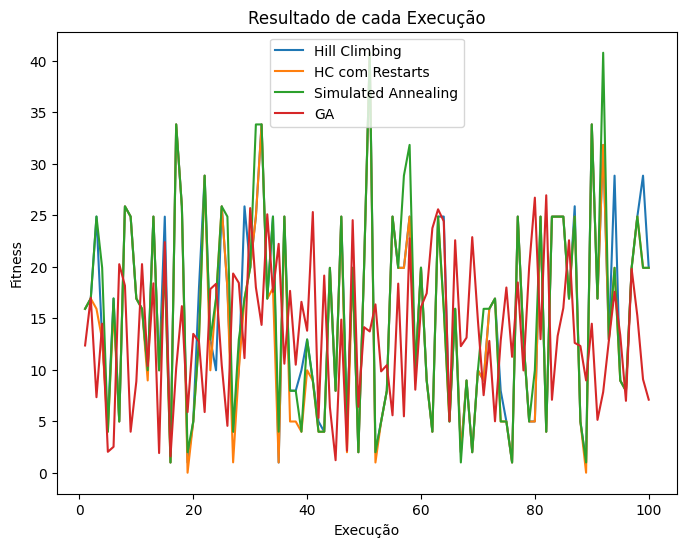

In [ ]:
import random
import math
import statistics
import matplotlib.pyplot as plt
import pandas as pd

def rastrigin(x, y):
    return 20 + x**2 - 10 * math.cos(2 * math.pi * x) + y**2 - 10 * math.cos(2 * math.pi * y)

def gera_vizinhos(x, y, std_dev):
    novo_x = x + random.gauss(0, std_dev)
    novo_y = y + random.gauss(0, std_dev)
    return novo_x, novo_y

def hill_climbing(x_inicial, y_inicial, std_dev, iteracoes):
    x_atual, y_atual = x_inicial, y_inicial
    melhor_x, melhor_y = x_atual, y_atual

    for _ in range(iteracoes):
        vizinho_x, vizinho_y = gera_vizinhos(x_atual, y_atual, std_dev)
        if rastrigin(vizinho_x, vizinho_y) < rastrigin(x_atual, y_atual):
            x_atual, y_atual = vizinho_x, vizinho_y
            if rastrigin(x_atual, y_atual) < rastrigin(melhor_x, melhor_y):
                melhor_x, melhor_y = x_atual, y_atual

    return rastrigin(melhor_x, melhor_y)

def hill_climbing_with_restarts(x_inicial, y_inicial, std_dev, iteracoes, restarts):
    melhor_fitness = float('inf')

    for _ in range(restarts):
        x_atual, y_atual = x_inicial, y_inicial

        for _ in range(iteracoes):
            vizinho_x, vizinho_y = gera_vizinhos(x_atual, y_atual, std_dev)
            if rastrigin(vizinho_x, vizinho_y) < rastrigin(x_atual, y_atual):
                x_atual, y_atual = vizinho_x, vizinho_y

        atual_fitness = rastrigin(x_atual, y_atual)
        if atual_fitness < melhor_fitness:
            melhor_fitness = atual_fitness

    return melhor_fitness

def simulated_annealing(x_inicial, y_inicial, std_dev, iteracoes):
    x_atual, y_atual = x_inicial, y_inicial
    melhor_x, melhor_y = x_atual, y_atual

    for i in range(iteracoes):
        temperature = max(0.01, 1 - i / (0.9 * iteracoes))

        vizinho_x, vizinho_y = gera_vizinhos(x_atual, y_atual, std_dev)
        delta = rastrigin(vizinho_x, vizinho_y) - rastrigin(x_atual, y_atual)

        if delta < 0 or random.random() < math.exp(-delta / temperature):
            x_atual, y_atual = vizinho_x, vizinho_y

        if rastrigin(x_atual, y_atual) < rastrigin(melhor_x, melhor_y):
            melhor_x, melhor_y = x_atual, y_atual

    return rastrigin(melhor_x, melhor_y)

def genetic_algorithm(populacao, geracoes, tx_mutacao):
    population = []
    for _ in range(populacao):
        x = random.uniform(-5.12, 5.12)
        y = random.uniform(-5.12, 5.12)
        population.append((x, y))

    for _ in range(geracoes):
        new_population = []
        for _ in range(populacao):
            parent1, parent2 = random.choices(population, k=2)
            alpha = random.uniform(0, 1)
            child_x = parent1[0] * alpha + parent2[0] * (1 - alpha)
            child_y = parent1[1] * alpha + parent2[1] * (1 - alpha)

            if random.random() < tx_mutacao:
                child_x += random.gauss(0, 0.1)
                child_y += random.gauss(0, 0.1)

            new_population.append((child_x, child_y))

        population = new_population

    melhor_fitness = float('inf')

    for individual in population:
        atual_fitness = rastrigin(individual[0], individual[1])
        if atual_fitness < melhor_fitness:
            melhor_fitness = atual_fitness

    return melhor_fitness

def run_algorithms(num_execucoes):
    results = []

    for _ in range(num_execucoes):
        x_inicial = random.uniform(-5.12, 5.12)
        y_inicial = random.uniform(-5.12, 5.12)

        hc_result = hill_climbing(x_inicial, y_inicial, std_dev=0.1, iteracoes=1000)
        hcr_result = hill_climbing_with_restarts(x_inicial, y_inicial, std_dev=0.1, iteracoes=1000, restarts=20)
        sa_result = simulated_annealing(x_inicial, y_inicial, std_dev=0.1, iteracoes=1000)
        ga_result = genetic_algorithm(populacao=20, geracoes=50, tx_mutacao=0.3)

        results.append([hc_result, hcr_result, sa_result, ga_result])

    algorithms = ['Hill Climbing', 'HC com Restarts', 'Simulated Annealing', 'GA']
    data = {algorithm: [result[i] for result in results] for i, algorithm in enumerate(algorithms)}

    df = pd.DataFrame(data)

    print("Tabela de Resultados:")
    print(df.describe())

    plt.figure(figsize=(8, 6))
    plt.boxplot(df.values, labels=df.columns)
    plt.title("Boxplot dos Resultados")
    plt.xlabel("Algoritmo")
    plt.ylabel("Fitness")
    plt.show()

    plt.figure(figsize=(8, 6))
    for i, algorithm in enumerate(algorithms):
        plt.plot(range(1, num_execucoes + 1), df[algorithm], label=algorithm)
    plt.title("Resultado de cada Execução")
    plt.xlabel("Execução")
    plt.ylabel("Fitness")
    plt.legend()
    plt.show()

run_algorithms(100)

# Implementação TSP

Tabela de Resultados:
       Hill Climbing  HC com Restarts  Simulated Annealing          GA
count      10.000000        10.000000            10.000000   10.000000
mean      366.530000       260.654341           268.556853  403.230478
std        39.048438         2.031136            15.305086   51.356625
min       317.464479       259.051492           259.051492  354.719731
25%       330.755210       259.051492           259.051492  370.182974
50%       367.179563       259.861370           259.051492  382.765195
75%       401.466727       261.822293           282.814896  419.823781
max       418.340114       265.147821           290.736030  506.528280


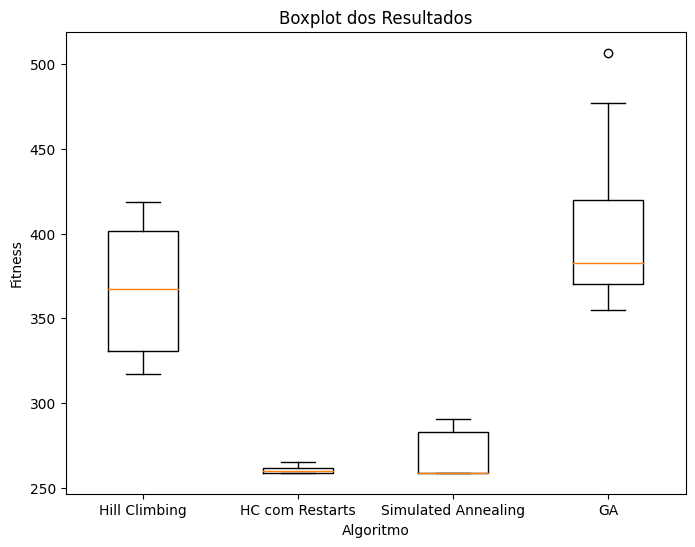

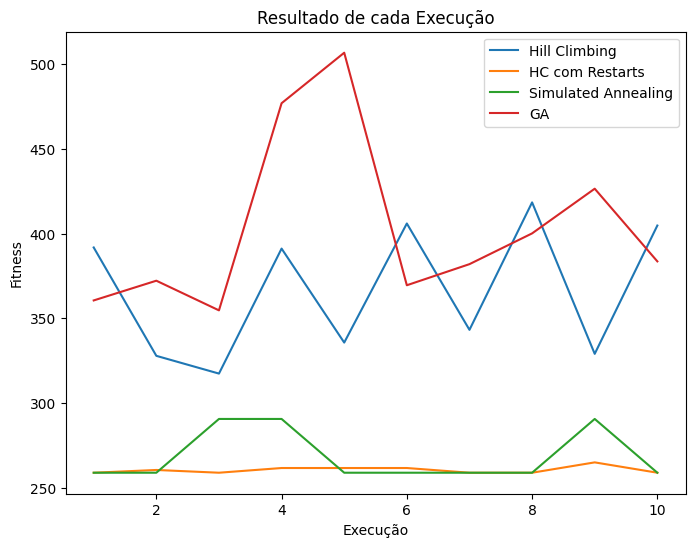

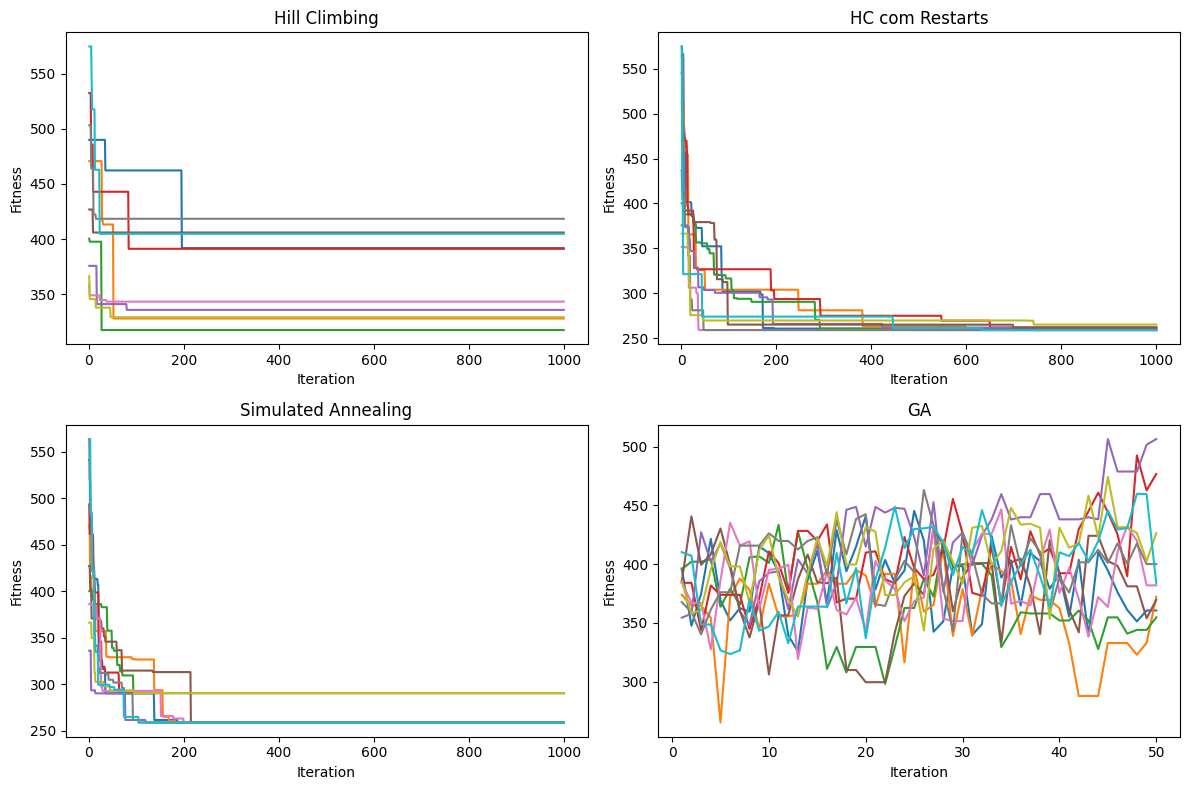

In [ ]:
import random
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

num_cidades = 10
cidades = []

for _ in range(num_cidades):
    x = random.uniform(0, 100)
    y = random.uniform(0, 100)
    cidades.append((x, y))

def distancia(cidade1, cidade2):
    x1, y1 = cidade1
    x2, y2 = cidade2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def tsp_fitness(route):
    custo = 0
    for i in range(len(route)):
        cidade1 = route[i]
        cidade2 = route[(i + 1) % len(route)]
        custo += distancia(cidade1, cidade2)
    return custo

def gera_vizinhos(route):
    new_route = route.copy()
    index1 = random.randint(0, len(route) - 1)
    index2 = random.randint(0, len(route) - 1)
    new_route[index1], new_route[index2] = new_route[index2], new_route[index1]
    return new_route

def hill_climbing(route, iteracoes):
    fitness_valores = []
    melhor_route = route.copy()
    melhor_fitness = tsp_fitness(melhor_route)

    for _ in range(iteracoes):
        neighbor = gera_vizinhos(route)
        neighbor_fitness = tsp_fitness(neighbor)
        if neighbor_fitness < melhor_fitness:
            melhor_route = neighbor
            melhor_fitness = neighbor_fitness
        fitness_valores.append(melhor_fitness)

    return melhor_route, melhor_fitness, fitness_valores

def hill_climbing_with_restarts(route, iteracoes, restarts):
    fitness_valores = []
    melhor_route = route.copy()
    melhor_fitness = tsp_fitness(melhor_route)

    for _ in range(restarts):
        atual_route = route.copy()

        for _ in range(iteracoes // restarts):
            neighbor = gera_vizinhos(atual_route)
            neighbor_fitness = tsp_fitness(neighbor)
            if neighbor_fitness < tsp_fitness(atual_route):
                atual_route = neighbor

            current_fitness = tsp_fitness(atual_route)
            if current_fitness < melhor_fitness:
                melhor_route = atual_route
                melhor_fitness = current_fitness
            fitness_valores.append(melhor_fitness)

    return melhor_route, melhor_fitness, fitness_valores

def simulated_annealing(route, iteracoes):
    fitness_valores = []
    atual_route = route.copy()
    melhor_route = route.copy()
    current_fitness = tsp_fitness(atual_route)
    melhor_fitness = tsp_fitness(melhor_route)

    for i in range(iteracoes):
        tempetaruta = max(0.01, 1 - i / (0.9 * iteracoes))

        neighbor = gera_vizinhos(atual_route)
        neighbor_fitness = tsp_fitness(neighbor)
        delta = neighbor_fitness - current_fitness

        if delta < 0 or random.random() < math.exp(-delta / tempetaruta):
            atual_route = neighbor
            current_fitness = neighbor_fitness

        if current_fitness < melhor_fitness:
            melhor_route = atual_route
            melhor_fitness = current_fitness
        fitness_valores.append(melhor_fitness)

    return melhor_route, melhor_fitness, fitness_valores

def genetic_algorithm(populacao_size, geracoes):
    fitness_valores = []
    populacao = []
    for _ in range(populacao_size):
        route = cidades.copy()
        random.shuffle(route)
        populacao.append(route)

    for _ in range(geracoes):
        nova_populacao = []

        while len(nova_populacao) < populacao_size:
            pai1, pai2 = random.choices(populacao, k=2)
            filho = crossover_ox(pai1, pai2)
            nova_populacao.append(filho)

        populacao = nova_populacao

        melhor_route = min(populacao, key=tsp_fitness)
        melhor_fitness = tsp_fitness(melhor_route)
        fitness_valores.append(melhor_fitness)

    return melhor_route, melhor_fitness, fitness_valores

def crossover_ox(pai1, pai2):
    tamanho = len(pai1)
    start = random.randint(0, tamanho - 1)
    end = random.randint(0, tamanho - 1)

    if start > end:
        start, end = end, start

    filho = [-1] * tamanho

    for i in range(start, end + 1):
        filho[i] = pai1[i]

    j = 0
    for i in range(tamanho):
        if filho[i] == -1:
            while pai2[j] in filho:
                j += 1
            filho[i] = pai2[j]
            j += 1

    return filho


def run_algorithms(num_executions):
    results = []

    for _ in range(num_executions):
        start_route = cidades.copy()
        random.shuffle(start_route)

        hc_route, hc_fitness, hc_fitness_values = hill_climbing(start_route, iteracoes=1000)
        hcr_route, hcr_fitness, hcr_fitness_values = hill_climbing_with_restarts(start_route, iteracoes=1000, restarts=20)
        sa_route, sa_fitness, sa_fitness_values = simulated_annealing(start_route, iteracoes=1000)
        ga_route, ga_fitness, ga_fitness_values = genetic_algorithm(populacao_size=20, geracoes=50)

        results.append([hc_fitness, hcr_fitness, sa_fitness, ga_fitness, hc_fitness_values, hcr_fitness_values, sa_fitness_values, ga_fitness_values])

    algorithms = ['Hill Climbing', 'HC com Restarts', 'Simulated Annealing', 'GA']
    data = {algorithm: [result[i] for result in results] for i, algorithm in enumerate(algorithms)}

    df = pd.DataFrame(data)

    print("Tabela de Resultados:")
    print(df.describe())

    plt.figure(figsize=(8, 6))
    plt.boxplot(df.values, labels=df.columns)
    plt.title("Boxplot dos Resultados")
    plt.xlabel("Algoritmo")
    plt.ylabel("Fitness")
    plt.show()

    plt.figure(figsize=(8, 6))
    for i, algorithm in enumerate(algorithms):
        plt.plot(range(1, num_executions + 1), df[algorithm], label=algorithm)
    plt.title("Resultado de cada Execução")
    plt.xlabel("Execução")
    plt.ylabel("Fitness")
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 8))
    for i, algorithm in enumerate(algorithms):
        plt.subplot(2, 2, i + 1)
        for result in results:
            plt.plot(range(1, len(result[i+4]) + 1), result[i+4])
        plt.title(algorithm)
        plt.xlabel("Iteration")
        plt.ylabel("Fitness")

    plt.tight_layout()
    plt.show()

run_algorithms(10)